In [1]:
# %load_ext rpy2.ipython 
# import vamb
%config IPCompleter.greedy=False
%config Completer.use_jedi=False
# %load_ext rpy2.ipython
%matplotlib inline


In [51]:
import pickle
import numpy as np
import pandas as pd
import os
import glob
import requests
import webbrowser
# import xmltodict
import json
from itertools import compress
import re
import seaborn as sns
import plotly as pl
import matplotlib
import matplotlib.pyplot as plt
from Bio import SeqIO
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import skew
import plotly.io as pio
import plotly.express as px
import csv
pio.renderers.default = 'iframe_connected'
plt.rcParams['figure.figsize'] = [10, 10]

In [11]:
!pwd

/mnt/storage/metagenome/two_soils_one_gos


In [5]:
%cd /home/gladkovgpu/metagenome/two_soils_one_gos/
!ls -halt --color

/mnt/storage/metagenome/two_soils_one_gos
total 9.8M
drwxrwxr-x  2 gladkovgpu gladkovgpu 4.0K Jan 10 13:11 anno
drwxrwxr-x  2 gladkovgpu gladkovgpu 4.0K Jan 10 12:40 medaka_chrz_2
-rw-rw-r--  1 gladkovgpu gladkovgpu 9.8M Jan 10 12:01 stderr_chrz_2.log
drwxrwxr-x  6 gladkovgpu gladkovgpu 4.0K Jan 10 10:22 .
-rw-rw-r--  1 gladkovgpu gladkovgpu  25K Jan 10 10:21 stderr.log
drwxrwxr-x  2 gladkovgpu gladkovgpu 4.0K Jan 10 10:21 medaka_chrz
-rw-rw-r--  1 gladkovgpu gladkovgpu  461 Jan  6 00:31 stderr_old.log
drwxrwxr-x 11 gladkovgpu gladkovgpu 4.0K Dec 28 09:10 flye_sodpod
-rw-r--r--  1 gladkovgpu gladkovgpu   92 Dec  5 12:23 params.json
lrwxrwxrwx  1 gladkovgpu gladkovgpu   32 Dec  5 09:08 chrz -> /mnt/workdir/2023_11_23_chernzem
lrwxrwxrwx  1 gladkovgpu gladkovgpu   34 Dec  5 09:07 sodpod -> /mnt/workdir/2022_11_02_SodPod_6_6
drwxrwxrwx 12 root       root       4.0K Dec  5 09:00 ..


In [6]:
 !ls anno

anno.sh			     pod.emapper.annotations
chrz.emapper.annotations     pod.emapper.genepred.fasta
chrz.emapper.genepred.fasta  pod.emapper.genepred.gff
chrz.emapper.genepred.gff    pod.emapper.hits
chrz.emapper.hits	     pod.emapper.seed_orthologs
chrz.emapper.seed_orthologs  pod_gtdb_kraken.tsv
chrz_report_gtdb	     pod_report_gtdb
crz_gtdb_kraken.tsv


In [7]:
!pwd

/mnt/storage/metagenome/two_soils_one_gos


In [16]:
path = f"/home/gladkovgpu/metagenome/two_soils_one_gos/anno"
files = sorted(glob.glob(f"/home/gladkovgpu/metagenome/two_soils_one_gos/anno/*.emapper.annotations"))
forward = [re.search( r'[c,l][1-3]', f).group() for f in files]
reverse = [re.search( r'(?<=\.)\w+', os.path.basename(f)).group(0)  for f in files]
names = [f'{i[0]}_{i[1]}' for i in zip(forward, reverse)]
file_list = list(zip(names, files))

header = pd.read_csv(file_list[1][1],sep="\t", skiprows=4 ,nrows=0).columns.to_list()
dfs = [pd.read_csv(f[1], sep="\t", comment="#", header=None, names=header).assign(mag_id=f[0]) for f in file_list]
df_anno_mn = pd.concat(dfs, ignore_index=True)
df_anno_mn = df_anno_mn.assign(site=df_anno_mn['mag_id'].str.split("_").str[0])
df_anno_mn = df_anno_mn.replace('-', np.nan)
df_anno_mn

AttributeError: 'NoneType' object has no attribute 'group'

In [26]:
path = f"/home/gladkovgpu/metagenome/two_soils_one_gos/anno"
files = sorted(glob.glob(f"/home/gladkovgpu/metagenome/two_soils_one_gos/anno/*.emapper.annotations"))
names = [os.path.basename(i).split('.')[0] for i in files]
file_list = list(zip(names, files))
file_list

[('chrz',
  '/home/gladkovgpu/metagenome/two_soils_one_gos/anno/chrz.emapper.annotations'),
 ('pod',
  '/home/gladkovgpu/metagenome/two_soils_one_gos/anno/pod.emapper.annotations')]

In [27]:
header = pd.read_csv(file_list[1][1],sep="\t", skiprows=4 ,nrows=0).columns.to_list()
dfs = [pd.read_csv(f[1], sep="\t", comment="#", header=None, names=header).assign(site=f[0]) for f in file_list]
df = pd.concat(dfs, ignore_index=True)

In [30]:
df = df.replace('-', np.nan)
df

,#query,seed_ortholog,evalue,score,eggNOG_OGs,max_annot_lvl,COG_category,Description,Preferred_name,GOs,...,KEGG_Pathway,KEGG_Module,KEGG_Reaction,KEGG_rclass,BRITE,KEGG_TC,CAZy,BiGG_Reaction,PFAMs,site
0,contig_10_1,1396141.BATP01000007_gene5730,7.890000e-88,309.0,"COG3808@1|root,COG3808@2|Bacteria,46S7R@74201|...",203494|Verrucomicrobiae,C,Sodium pump that utilizes the energy of pyroph...,hppA,NaN,...,"ko00190,map00190",NaN,NaN,NaN,"ko00000,ko00001,ko01000",3.A.10.1,NaN,NaN,H_PPase,chrz
1,contig_10_2,497964.CfE428DRAFT_0699,4.740000e-38,152.0,"COG0745@1|root,COG1235@1|root,COG0745@2|Bacter...",74201|Verrucomicrobia,T,Beta-lactamase superfamily domain,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lactamase_B_2,chrz
2,contig_10_0,1123368.AUIS01000044_gene15,1.150000e-134,429.0,"COG1502@1|root,COG1502@2|Bacteria,1MWUW@1224|P...",225057|Acidithiobacillales,I,Phospholipase D Transphosphatidylase,NaN,NaN,...,"ko00564,ko01100,map00564,map01100",NaN,R07390,RC00017,"ko00000,ko00001,ko01000",NaN,NaN,NaN,PLDc_2,chrz
3,contig_100_7,1454007.JAUG01000043_gene14,3.810000e-90,317.0,"COG0526@1|root,COG0526@2|Bacteria,4P0TY@976|Ba...",976|Bacteroidetes,CO,Thioredoxin,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,chrz
4,contig_100_6,1454007.JAUG01000043_gene13,2.830000e-90,312.0,"COG0526@1|root,COG0526@2|Bacteria,4P1K2@976|Ba...",976|Bacteroidetes,CO,Thioredoxin,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AhpC-TSA,chrz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296696,contig_99998_0,1265502.KB905929_gene2253,0.000000e+00,1226.0,"COG1048@1|root,COG1048@2|Bacteria,1MU9T@1224|P...",28216|Betaproteobacteria,C,aconitate hydratase,acnA,NaN,...,"ko00020,ko00630,ko00720,ko01100,ko01110,ko0112...","M00009,M00010,M00012,M00173,M00740","R01324,R01325,R01900","RC00497,RC00498,RC00618","br01601,ko00000,ko00001,ko00002,ko01000",NaN,NaN,NaN,"Aconitase,Aconitase_C",pod
1296697,contig_99998_5,420662.Mpe_A2889,6.290000e-89,298.0,"COG1741@1|root,COG1741@2|Bacteria,1MVSW@1224|P...",28216|Betaproteobacteria,S,Belongs to the pirin family,yhhW_2,NaN,...,NaN,NaN,NaN,NaN,ko00000,NaN,NaN,NaN,Pirin,pod
1296698,contig_99998_8,1502852.FG94_04632,3.120000e-38,155.0,"COG3228@1|root,COG3228@2|Bacteria,1RAHF@1224|P...",28216|Betaproteobacteria,S,Glucose-regulated metallo-peptidase M90,mtfA,NaN,...,NaN,NaN,NaN,NaN,"ko00000,ko01002",NaN,NaN,NaN,Peptidase_M90,pod
1296699,contig_99998_9,882378.RBRH_04047,3.060000e-25,113.0,"COG1862@1|root,COG1862@2|Bacteria,1MZT2@1224|P...",28216|Betaproteobacteria,U,"Preprotein translocase, YajC subunit",yajC,NaN,...,"ko02024,ko03060,ko03070,map02024,map03060,map0...",M00335,NaN,NaN,"ko00000,ko00001,ko00002,ko02044","3.A.5.1,3.A.5.2",NaN,NaN,YajC,pod


In [40]:
file_list
, names=['contig', 'hue' , 'tax']

[('chrz',
  '/home/gladkovgpu/metagenome/two_soils_one_gos/anno/chrz_gtdb_kraken.tsv'),
 ('pod',
  '/home/gladkovgpu/metagenome/two_soils_one_gos/anno/pod_gtdb_kraken.tsv')]

In [71]:
files = sorted(glob.glob("/home/gladkovgpu/metagenome/two_soils_one_gos/anno/*kraken.tsv"))
names = [os.path.basename(i).split("_gtdb_kraken")[0] for i in files]
file_list = list(zip(names, files))
taxa = [pd.read_csv(f[1], sep="\t", quoting=csv.QUOTE_NONE, usecols=[0, 2], names=['contig', 'taxa']).assign(site=f[0]) for f in file_list]
taxa = pd.concat(taxa, ignore_index=True)
taxa[[ 'Kingdom','Phylum', 'Class', 'Order', 'Family', 'Genus', 'Species', 'hue']] = taxa['taxa'].str.split(';', expand=True)
# taxa['taxa'].str.split(';', expand=True)
taxa = taxa.drop(columns=['hue', 'taxa'])

In [73]:
taxa

,contig,site,Kingdom,Phylum,Class,Order,Family,Genus,Species
0,contig_10,chrz,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Chthoniobacterales,UBA10450,Udaeobacter,Udaeobacter sp003217895
1,contig_100,chrz,Bacteria,Bacteroidota,Bacteroidia,Chitinophagales,Chitinophagaceae,VBAR01,VBAR01 sp005882315
2,contig_1000,chrz,Bacteria,Actinobacteriota,Actinomycetia,Streptomycetales,Streptomycetaceae,Streptomyces,None
3,contig_10000,chrz,Bacteria,Actinobacteriota,Thermoleophilia,Gaiellales,Gaiellaceae,JACCYG01,JACCYG01 sp013696595
4,contig_10001,chrz,Bacteria,Actinobacteriota,Thermoleophilia,Gaiellales,Gaiellaceae,3-1-20CM-4-69-9,3-1-20CM-4-69-9 sp005885245
...,...,...,...,...,...,...,...,...,...
137346,contig_6618,pod,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Burkholderiaceae,Paraburkholderia,Paraburkholderia bannensis
137347,contig_30818,pod,Bacteria,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Sphingomicrobium,Sphingomicrobium sp016924655
137348,contig_19170,pod,Bacteria,Actinobacteriota,Thermoleophilia,Gaiellales,Gaiellaceae,Palsa-739,Palsa-739 sp019234175
137349,contig_45413,pod,Bacteria,None,None,None,None,None,None


```

minimap2 -x map-ont -a -t 30 ../flye_sodpod/assembly.fasta ../sodpod/all.fq.gz | samtools sort -o sorted_bam/sod_sorted.bam  
samtools coverage  sorted_bam/sod_sorted.bam > depth/sod_depth.txt 
minimap2 -x map-ont -a -t 30 ../chrz/flye/assembly.fasta ../chrz/all.fq | samtools sort -o sorted_bam/chrz_sorted.bam  
samtools coverage  sorted_bam/chrz_sorted.bam > depth/chrz_depth.txt


```

In [111]:
files = sorted(glob.glob("/home/gladkovgpu/metagenome/two_soils_one_gos/anno/depth/*_depth.txt"))
names = [os.path.basename(i).split("_depth")[0] for i in files]
file_list = list(zip(names, files))
header = pd.read_csv(file_list[1][1],sep="\t",nrows=0).columns.to_list()
dfs = [pd.read_csv(f[1], sep="\t").assign(site=f[0]) for f in file_list]
dfpaf = pd.concat(dfs, ignore_index=True)
dfpaf

,#rname,startpos,endpos,numreads,covbases,coverage,meandepth,meanbaseq,meanmapq,site
0,contig_10,1,4366,56,4366,100.0000,15.13900,18.3,38.6,chrz
1,contig_100,1,27527,69,27451,99.7239,5.27202,18.2,55.9,chrz
2,contig_1000,1,10343,131,10339,99.9613,12.01620,18.0,44.5,chrz
3,contig_10000,1,21387,133,21367,99.9065,9.53051,18.5,48.2,chrz
4,contig_10001,1,48892,231,48882,99.9795,6.96519,18.3,40.0,chrz
...,...,...,...,...,...,...,...,...,...,...
137346,contig_99998,1,14252,113,14252,100.0000,9.48477,18.8,30.9,pod
137347,contig_23368,1,561,0,0,0.0000,0.00000,0.0,0.0,pod
137348,contig_33813,1,777,0,0,0.0000,0.00000,0.0,0.0,pod
137349,contig_79078,1,47,0,0,0.0000,0.00000,0.0,0.0,pod


In [82]:
a = dfpaf.meandepth.sum()
b = dfpaf.shape[0]
a / b

7.2328559646307635

In [179]:
dfpaf_transformed = dfpaf.copy() 
dfpaf_transformed['log_depth'] = dfpaf_transformed['meandepth'].apply(np.log10)

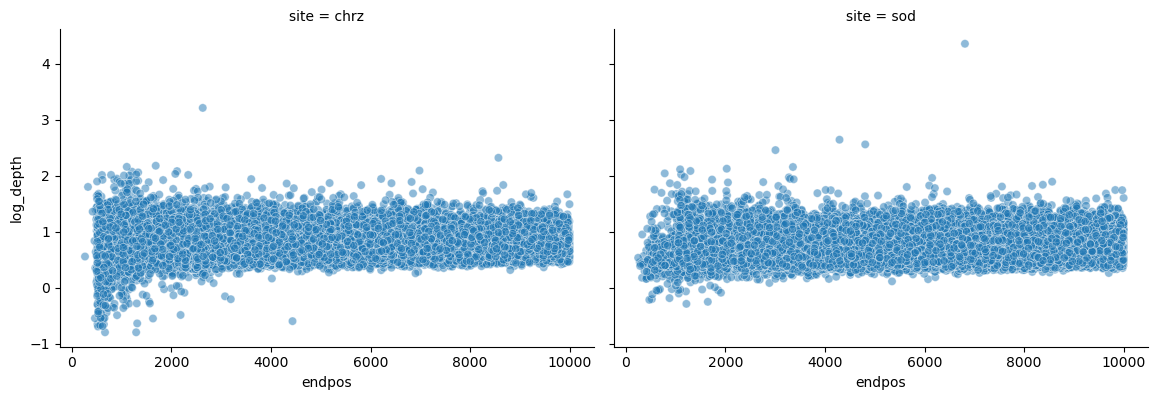

In [95]:
g = sns.FacetGrid(dfpaf_transformed[dfpaf_transformed["endpos"] < 10000] , col="site", height=4.1, aspect=1.4, col_wrap=3)
g.map(sns.scatterplot, "endpos", "log_depth", "site", alpha=0.5)

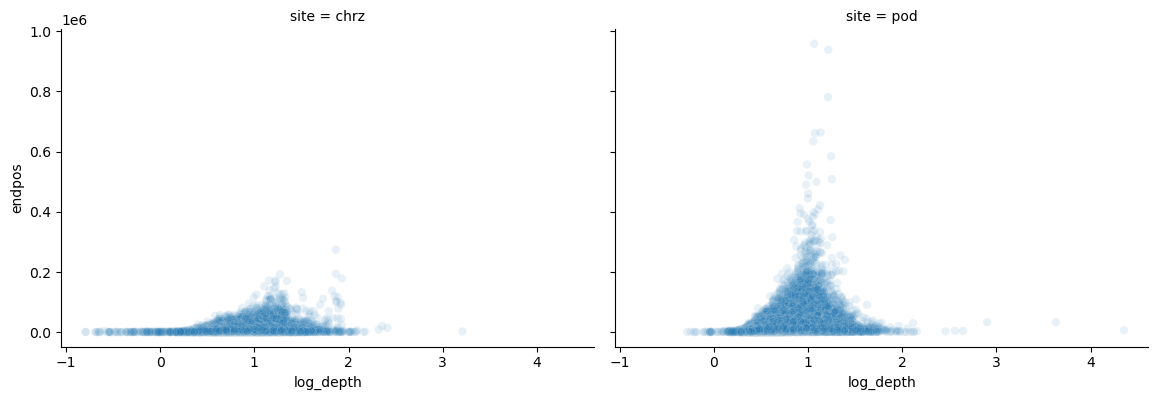

In [183]:
g = sns.FacetGrid(data=dfpaf_transformed , col="site", height=4.1, aspect=1.4, col_wrap=3)
g.map(sns.scatterplot, "log_depth", "endpos", "site", alpha=0.1)

<Axes: xlabel='endpos', ylabel='log_depth'>

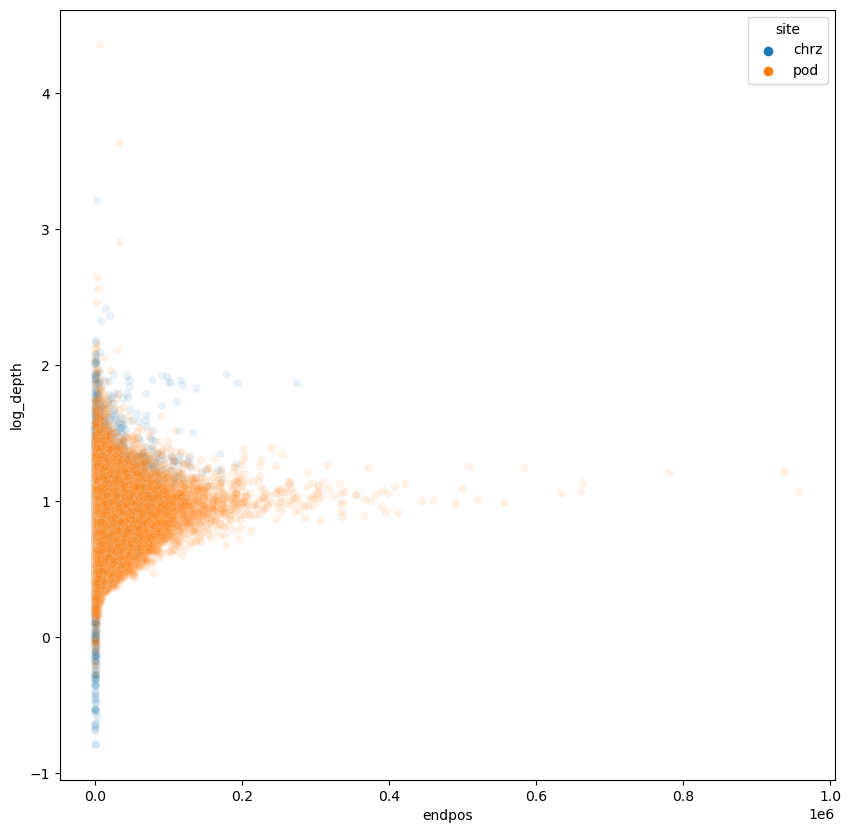

In [181]:

sns.scatterplot(data=dfpaf_transformed, x="endpos", y="log_depth", hue="site", alpha=0.1)


In [184]:
dfpaf_transformed = dfpaf.copy() 
dfpaf_transformed['log_depth'] = dfpaf_transformed['meandepth'].apply(np.log10)

dfpaf_transformed = dfpaf_transformed[dfpaf_transformed["endpos"] > 5000][['#rname', 'site', 'meandepth']]
dfpaf_transformed

,#rname,site,meandepth
1,contig_100,chrz,5.27202
2,contig_1000,chrz,12.01620
3,contig_10000,chrz,9.53051
4,contig_10001,chrz,6.96519
6,contig_10003,chrz,14.34750
...,...,...,...
137341,contig_99993,pod,5.93535
137342,contig_99994,pod,9.60537
137344,contig_99996,pod,5.49299
137345,contig_99997,pod,9.51559


In [187]:
dfpaf_transformed['id'] = dfpaf_transformed['site'] + "_" + dfpaf_transformed['#rname']
dfpaf_transformed

,#rname,site,meandepth,id
1,contig_100,chrz,5.27202,chrz_contig_100
2,contig_1000,chrz,12.01620,chrz_contig_1000
3,contig_10000,chrz,9.53051,chrz_contig_10000
4,contig_10001,chrz,6.96519,chrz_contig_10001
6,contig_10003,chrz,14.34750,chrz_contig_10003
...,...,...,...,...
137341,contig_99993,pod,5.93535,pod_contig_99993
137342,contig_99994,pod,9.60537,pod_contig_99994
137344,contig_99996,pod,5.49299,pod_contig_99996
137345,contig_99997,pod,9.51559,pod_contig_99997


In [134]:
dff = df.copy()
dff = dff[["#query", "KEGG_ko","CAZy","EC", "site"]]
dff['id'] = dff['site'] + "_" + dff['#query'].str.split("_").str[:2].str.join("_") 
dff = dff.merge(dfpaf_transformed, on='id', how='left')
dff

,#query,KEGG_ko,CAZy,EC,site_x,id,#rname,site_y,meandepth
0,contig_10_1,ko:K15987,NaN,3.6.1.1,chrz,chrz_contig_10,NaN,NaN,NaN
1,contig_10_2,NaN,NaN,NaN,chrz,chrz_contig_10,NaN,NaN,NaN
2,contig_10_0,ko:K06131,NaN,NaN,chrz,chrz_contig_10,NaN,NaN,NaN
3,contig_100_7,NaN,NaN,NaN,chrz,chrz_contig_100,contig_100,chrz,5.27202
4,contig_100_6,NaN,NaN,NaN,chrz,chrz_contig_100,contig_100,chrz,5.27202
...,...,...,...,...,...,...,...,...,...
1296696,contig_99998_0,ko:K01681,NaN,4.2.1.3,pod,pod_contig_99998,contig_99998,pod,9.48477
1296697,contig_99998_5,ko:K06911,NaN,NaN,pod,pod_contig_99998,contig_99998,pod,9.48477
1296698,contig_99998_8,ko:K09933,NaN,NaN,pod,pod_contig_99998,contig_99998,pod,9.48477
1296699,contig_99998_9,ko:K03210,NaN,NaN,pod,pod_contig_99998,contig_99998,pod,9.48477


In [135]:
dff = dff.dropna(subset=['site_y', 'KEGG_ko'])
dff = dff.drop(columns='site_y').rename(columns={"site_x": "site"})
dff

,#query,KEGG_ko,CAZy,EC,site,id,#rname,meandepth
8,contig_100_4,ko:K21572,NaN,NaN,chrz,chrz_contig_100,contig_100,5.27202
10,contig_100_5,ko:K21572,NaN,NaN,chrz,chrz_contig_100,contig_100,5.27202
15,contig_1000_2,ko:K00826,NaN,2.6.1.42,chrz,chrz_contig_1000,contig_1000,12.01620
16,contig_1000_1,ko:K07222,NaN,NaN,chrz,chrz_contig_1000,contig_1000,12.01620
19,contig_10000_0,ko:K00121,NaN,"1.1.1.1,1.1.1.284",chrz,chrz_contig_10000,contig_10000,9.53051
...,...,...,...,...,...,...,...,...
1296696,contig_99998_0,ko:K01681,NaN,4.2.1.3,pod,pod_contig_99998,contig_99998,9.48477
1296697,contig_99998_5,ko:K06911,NaN,NaN,pod,pod_contig_99998,contig_99998,9.48477
1296698,contig_99998_8,ko:K09933,NaN,NaN,pod,pod_contig_99998,contig_99998,9.48477
1296699,contig_99998_9,ko:K03210,NaN,NaN,pod,pod_contig_99998,contig_99998,9.48477


In [117]:
dff = dff.reset_index()
dff.loc[dff["KEGG_ko"] == "K00001"]

,KEGG_ko,site_y,weight
0,K00001,chrz,1.298381e+05
1,K00001,pod,3.440818e+06


In [130]:
df_dram

,category,subcategory,function_name,function_ids,long_function_name,gene_symbol
0,CAZy,CAZy,Polyphenolics,"K05909, AA1, AA2, K00422",Polyphenolics Cleavage,NaN
1,CAZy,CAZy,Crystalline Cellulose,"GH7, GH48, AA10, AA15, AA16, AA9, AA10, AA11, ...",Crystalline Cellulose Backbone Cleavage,NaN
2,CAZy,CAZy,Amorphous Cellulose,"GH5, GH6, GH7, GH8, GH9, GH10, GH124, GH12, GH...",Amorphous Cellulose Backbone Cleavage,NaN
3,CAZy,CAZy,Amorphous Cellulose,"GH94, GH1, GH2, GH3, GH5, GH9, GH16, GH116",Amorphous Cellulose Oligo Cleavage,NaN
4,CAZy,CAZy,Mucin,GH101,Mucin Backbone Cleavage,NaN
...,...,...,...,...,...,...
111,Additional,Xenobiotics,Polycyclic,"K18069,K18074,K14580,K00480,K11944,K18252,K145...",Polyphenolics,NaN
112,Additional,Xenobiotics,Benzoate,"K16515,K22270,K04107,K07534,K01666,K00449,K162...",Benzoate,NaN
113,Additional,Xenobiotics,Aminobenzoate,"K03862,K09461,K25933,K04099,K15059,K04107,K235...",Aminobenzoate,NaN
114,Additional,Xenobiotics,Furfural,"K16876,K16873,K16878,K16875,K16877,K16879,K168...",Furfural,NaN


In [149]:
dram_test = df_dram.iloc[0:2, :]

In [152]:
df_anno = dff.copy()
df_heatdram_full = pd.DataFrame(columns = ['site_id'] + df_dram.function_name.to_list())
for i in df_anno["site"].unique().tolist():
    mag_df = df_anno.loc[df_anno["site"] == i]
    new_row = [i]
    count_all = mag_df.count()["#query"]
    for index, row in df_dram.iterrows():
        count_res = 0
        for a in row['function_ids'].split(','):
            pattern = a.rstrip().lstrip()
            base_pattern = re.search(r'[A-Z]', a.rstrip().lstrip()).group(0)
            if base_pattern in ['K']:
                counter= mag_df[mag_df.KEGG_ko.str.contains(pattern, na=False)].count()["#query"]
                count_res+=counter
            if base_pattern in ['G','L','P','A']:
                counter = mag_df[mag_df.CAZy.str.contains(pattern, na=False)].count()["#query"]
                count_res+=counter
            if base_pattern in ['E']:
                pattern_mod = re.search( r'(?<=EC:).*', pattern).group() 
                counter = mag_df[mag_df.EC.str.contains(pattern_mod, na=False)].count()["#query"]
                count_res+=counter
        new_row.append(count_res / count_all * 100)
    a_series = pd.Series(new_row, index = df_heatdram_full.columns) 
    df_heatdram_full = df_heatdram_full._append(a_series, ignore_index=True)

In [159]:
df_heatdram_full.sum(axis=1, skipna=True, numeric_only=True)

0     2.030843
1    15.576533
dtype: float64

In [166]:
df_anno = dff.copy()
df_heatdram_full_2 = pd.DataFrame(columns = ['site_id'] + df_dram.function_name.to_list())
for i in df_anno["site"].unique().tolist():
    mag_df = df_anno.loc[df_anno["site"] == i]
    new_row = [i]
    count_all = mag_df.count()["#query"]
    for index, row in df_dram.iterrows():
        count_res = 0
        for a in row['function_ids'].split(','):
            pattern = a.rstrip().lstrip()
            base_pattern = re.search(r'[A-Z]', a.rstrip().lstrip()).group(0)
            if base_pattern in ['K']:
                counter= mag_df[mag_df.KEGG_ko.str.contains(pattern, na=False)].count()["#query"]
                count_res+=counter
            if base_pattern in ['G','L','P','A']:
                counter = mag_df[mag_df.CAZy.str.contains(pattern, na=False)].count()["#query"]
                count_res+=counter
            if base_pattern in ['E']:
                pattern_mod = re.search( r'(?<=EC:).*', pattern).group() 
                counter = mag_df[mag_df.EC.str.contains(pattern_mod, na=False)].count()["#query"]
                count_res+=counter
        new_row.append(count_res / count_all * 100)
    a_series = pd.Series(new_row, index = df_heatdram_full_2.columns) 
    df_heatdram_full_2 = df_heatdram_full_2._append(a_series, ignore_index=True)

In [167]:
df_heatdram_full_2.sum(axis=1, skipna=True, numeric_only=True)

0    16.613672
1    17.745761
dtype: float64

In [169]:
df_heatdram_full_2.to_csv("/home/gladkovgpu/metagenome/two_soils_one_gos/dram_out_2.csv")

In [154]:
df_heatdram_full.to_csv("/home/gladkovgpu/metagenome/two_soils_one_gos/dram_out.csv")

In [ ]:
t.groupby('Quantity').agg({'Items': 'sum'}).sort_values('Items', ascending=False)/df['Items'].sum()*100

In [119]:
dff.to_csv("/home/gladkovgpu/metagenome/two_soils_one_gos/kegg_out.csv")

In [123]:
df_dram = pd.read_csv("/home/gladkovgpu/metagenome/rnf_c_new/semibin/function_heatmap_form.tsv", sep="\t")
df_dram

,category,subcategory,function_name,function_ids,long_function_name,gene_symbol
0,CAZy,CAZy,Polyphenolics,"K05909, AA1, AA2, K00422",Polyphenolics Cleavage,NaN
1,CAZy,CAZy,Crystalline Cellulose,"GH7, GH48, AA10, AA15, AA16, AA9, AA10, AA11, ...",Crystalline Cellulose Backbone Cleavage,NaN
2,CAZy,CAZy,Amorphous Cellulose,"GH5, GH6, GH7, GH8, GH9, GH10, GH124, GH12, GH...",Amorphous Cellulose Backbone Cleavage,NaN
3,CAZy,CAZy,Amorphous Cellulose,"GH94, GH1, GH2, GH3, GH5, GH9, GH16, GH116",Amorphous Cellulose Oligo Cleavage,NaN
4,CAZy,CAZy,Mucin,GH101,Mucin Backbone Cleavage,NaN
...,...,...,...,...,...,...
111,Additional,Xenobiotics,Polycyclic,"K18069,K18074,K14580,K00480,K11944,K18252,K145...",Polyphenolics,NaN
112,Additional,Xenobiotics,Benzoate,"K16515,K22270,K04107,K07534,K01666,K00449,K162...",Benzoate,NaN
113,Additional,Xenobiotics,Aminobenzoate,"K03862,K09461,K25933,K04099,K15059,K04107,K235...",Aminobenzoate,NaN
114,Additional,Xenobiotics,Furfural,"K16876,K16873,K16878,K16875,K16877,K16879,K168...",Furfural,NaN


In [ ]:
df_heatdram_full = pd.DataFrame(columns = ['site_id'] + df_dram.function_name.to_list())
for i in df_anno["site"].unique().tolist():
    mag_df = df_anno.loc[df_anno["site"] == i]
    new_row = [i]
    count_all = df_anno.count()["#query"]
    for index, row in df_dram.iterrows():
        count_res = 0
        for a in row['function_ids'].split(','):
            pattern = a.rstrip().lstrip()
            base_pattern = re.search(r'[A-Z]', a.rstrip().lstrip()).group(0)
            if base_pattern in ['K']:
                counter= mag_df[mag_df.KEGG_ko.str.contains(pattern, na=False)].count()["#query"]
                count_res+=counter
            if base_pattern in ['G','L','P','A']:
                counter = mag_df[mag_df.CAZy.str.contains(pattern, na=False)].count()["#query"]
                count_res+=counter
            if base_pattern in ['E']:
                pattern_mod = re.search( r'(?<=EC:).*', pattern).group() 
                counter = mag_df[mag_df.EC.str.contains(pattern_mod, na=False)].count()["#query"]
                count_res+=counter
        new_row.append(count_res / count_all * 100)
    a_series = pd.Series(new_row, index = df_heatdram_full.columns) 
    df_heatdram_full = df_heatdram_full._append(a_series, ignore_index=True)

In [171]:
taxa['id'] = taxa['site'] + "_" + taxa['contig']
taxa

,contig,site,Kingdom,Phylum,Class,Order,Family,Genus,Species,id
0,contig_10,chrz,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Chthoniobacterales,UBA10450,Udaeobacter,Udaeobacter sp003217895,chrz_contig_10
1,contig_100,chrz,Bacteria,Bacteroidota,Bacteroidia,Chitinophagales,Chitinophagaceae,VBAR01,VBAR01 sp005882315,chrz_contig_100
2,contig_1000,chrz,Bacteria,Actinobacteriota,Actinomycetia,Streptomycetales,Streptomycetaceae,Streptomyces,None,chrz_contig_1000
3,contig_10000,chrz,Bacteria,Actinobacteriota,Thermoleophilia,Gaiellales,Gaiellaceae,JACCYG01,JACCYG01 sp013696595,chrz_contig_10000
4,contig_10001,chrz,Bacteria,Actinobacteriota,Thermoleophilia,Gaiellales,Gaiellaceae,3-1-20CM-4-69-9,3-1-20CM-4-69-9 sp005885245,chrz_contig_10001
...,...,...,...,...,...,...,...,...,...,...
137346,contig_6618,pod,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Burkholderiaceae,Paraburkholderia,Paraburkholderia bannensis,pod_contig_6618
137347,contig_30818,pod,Bacteria,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Sphingomicrobium,Sphingomicrobium sp016924655,pod_contig_30818
137348,contig_19170,pod,Bacteria,Actinobacteriota,Thermoleophilia,Gaiellales,Gaiellaceae,Palsa-739,Palsa-739 sp019234175,pod_contig_19170
137349,contig_45413,pod,Bacteria,None,None,None,None,None,None,pod_contig_45413


In [186]:
dfpaf_transformed

,#rname,site,meandepth
1,contig_100,chrz,5.27202
2,contig_1000,chrz,12.01620
3,contig_10000,chrz,9.53051
4,contig_10001,chrz,6.96519
6,contig_10003,chrz,14.34750
...,...,...,...
137341,contig_99993,pod,5.93535
137342,contig_99994,pod,9.60537
137344,contig_99996,pod,5.49299
137345,contig_99997,pod,9.51559


In [188]:
taxadd = taxa.merge(dfpaf_transformed, on='id', how='left')
taxadd

,contig,site_x,Kingdom,Phylum,Class,Order,Family,Genus,Species,id,#rname,site_y,meandepth
0,contig_10,chrz,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Chthoniobacterales,UBA10450,Udaeobacter,Udaeobacter sp003217895,chrz_contig_10,NaN,NaN,NaN
1,contig_100,chrz,Bacteria,Bacteroidota,Bacteroidia,Chitinophagales,Chitinophagaceae,VBAR01,VBAR01 sp005882315,chrz_contig_100,contig_100,chrz,5.27202
2,contig_1000,chrz,Bacteria,Actinobacteriota,Actinomycetia,Streptomycetales,Streptomycetaceae,Streptomyces,None,chrz_contig_1000,contig_1000,chrz,12.01620
3,contig_10000,chrz,Bacteria,Actinobacteriota,Thermoleophilia,Gaiellales,Gaiellaceae,JACCYG01,JACCYG01 sp013696595,chrz_contig_10000,contig_10000,chrz,9.53051
4,contig_10001,chrz,Bacteria,Actinobacteriota,Thermoleophilia,Gaiellales,Gaiellaceae,3-1-20CM-4-69-9,3-1-20CM-4-69-9 sp005885245,chrz_contig_10001,contig_10001,chrz,6.96519
...,...,...,...,...,...,...,...,...,...,...,...,...,...
137346,contig_6618,pod,Bacteria,Proteobacteria,Gammaproteobacteria,Burkholderiales,Burkholderiaceae,Paraburkholderia,Paraburkholderia bannensis,pod_contig_6618,NaN,NaN,NaN
137347,contig_30818,pod,Bacteria,Proteobacteria,Alphaproteobacteria,Sphingomonadales,Sphingomonadaceae,Sphingomicrobium,Sphingomicrobium sp016924655,pod_contig_30818,NaN,NaN,NaN
137348,contig_19170,pod,Bacteria,Actinobacteriota,Thermoleophilia,Gaiellales,Gaiellaceae,Palsa-739,Palsa-739 sp019234175,pod_contig_19170,NaN,NaN,NaN
137349,contig_45413,pod,Bacteria,None,None,None,None,None,None,pod_contig_45413,NaN,NaN,NaN


In [190]:
taxadd = taxadd.dropna(subset=['site_y', 'Kingdom'])
taxadd = taxadd.drop(columns='site_y').rename(columns={"site_x": "site"})
taxadd 

,contig,site,Kingdom,Phylum,Class,Order,Family,Genus,Species,id,#rname,meandepth
1,contig_100,chrz,Bacteria,Bacteroidota,Bacteroidia,Chitinophagales,Chitinophagaceae,VBAR01,VBAR01 sp005882315,chrz_contig_100,contig_100,5.27202
2,contig_1000,chrz,Bacteria,Actinobacteriota,Actinomycetia,Streptomycetales,Streptomycetaceae,Streptomyces,None,chrz_contig_1000,contig_1000,12.01620
3,contig_10000,chrz,Bacteria,Actinobacteriota,Thermoleophilia,Gaiellales,Gaiellaceae,JACCYG01,JACCYG01 sp013696595,chrz_contig_10000,contig_10000,9.53051
4,contig_10001,chrz,Bacteria,Actinobacteriota,Thermoleophilia,Gaiellales,Gaiellaceae,3-1-20CM-4-69-9,3-1-20CM-4-69-9 sp005885245,chrz_contig_10001,contig_10001,6.96519
6,contig_10003,chrz,Bacteria,Actinobacteriota,Thermoleophilia,Gaiellales,Gaiellaceae,GMQP-bins7,GMQP-bins7 sp004366385,chrz_contig_10003,contig_10003,14.34750
...,...,...,...,...,...,...,...,...,...,...,...,...
137191,contig_107297,pod,Bacteria,Actinobacteriota,Actinomycetia,Propionibacteriales,Nocardioidaceae,Nocardioides,Nocardioides sp009823805,pod_contig_107297,contig_107297,5.32019
137192,contig_22388,pod,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Hyphomicrobiaceae,Hyphomicrobium_A,Hyphomicrobium_A sp009708035,pod_contig_22388,contig_22388,2.92066
137193,contig_68806,pod,Bacteria,Cyanobacteria,Cyanobacteriia,Cyanobacteriales,Coleofasciculaceae,PCC7113,PCC7113 sp000317515,pod_contig_68806,contig_68806,2.77968
137194,contig_66404,pod,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Xanthobacteraceae,Bradyrhizobium,Bradyrhizobium canariense,pod_contig_66404,contig_66404,5.39643


In [192]:
tax_m = taxadd.drop(columns={'#rname', 'id', 'contig'})
tax_m
              

,site,Kingdom,Phylum,Class,Order,Family,Genus,Species,meandepth
1,chrz,Bacteria,Bacteroidota,Bacteroidia,Chitinophagales,Chitinophagaceae,VBAR01,VBAR01 sp005882315,5.27202
2,chrz,Bacteria,Actinobacteriota,Actinomycetia,Streptomycetales,Streptomycetaceae,Streptomyces,None,12.01620
3,chrz,Bacteria,Actinobacteriota,Thermoleophilia,Gaiellales,Gaiellaceae,JACCYG01,JACCYG01 sp013696595,9.53051
4,chrz,Bacteria,Actinobacteriota,Thermoleophilia,Gaiellales,Gaiellaceae,3-1-20CM-4-69-9,3-1-20CM-4-69-9 sp005885245,6.96519
6,chrz,Bacteria,Actinobacteriota,Thermoleophilia,Gaiellales,Gaiellaceae,GMQP-bins7,GMQP-bins7 sp004366385,14.34750
...,...,...,...,...,...,...,...,...,...
137191,pod,Bacteria,Actinobacteriota,Actinomycetia,Propionibacteriales,Nocardioidaceae,Nocardioides,Nocardioides sp009823805,5.32019
137192,pod,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Hyphomicrobiaceae,Hyphomicrobium_A,Hyphomicrobium_A sp009708035,2.92066
137193,pod,Bacteria,Cyanobacteria,Cyanobacteriia,Cyanobacteriales,Coleofasciculaceae,PCC7113,PCC7113 sp000317515,2.77968
137194,pod,Bacteria,Proteobacteria,Alphaproteobacteria,Rhizobiales,Xanthobacteraceae,Bradyrhizobium,Bradyrhizobium canariense,5.39643


In [200]:
tax_m = tax_m.groupby(tax_m.columns.to_list()[:-1]).sum().reset_index()
tax_m

,site,Kingdom,Phylum,Class,Order,Family,Genus,Species,meandepth
0,chrz,Archaea,Asgardarchaeota,Lokiarchaeia,CR-4,SOKP01,TEKIR-8,TEKIR-8 sp004524365,4.04501
1,chrz,Archaea,Asgardarchaeota,Lokiarchaeia,Helarchaeales,JABXJV01,JABXJV01 sp019058315,019058315,5.87322
2,chrz,Archaea,Hydrothermarchaeota,Hydrothermarchaeia,Hydrothermarchaeales,WAQR01,WAQR01 sp015520145,015520145,3.72611
3,chrz,Archaea,Thermoplasmatota,Poseidoniia,Poseidoniales,Thalassarchaeaceae,MGIIb-O2,MGIIb-O2 sp004195525,3.55690
4,chrz,Archaea,Thermoproteota,Nitrososphaeria,Nitrososphaerales,Nitrosocaldaceae,Nitrosocaldus,Nitrosocaldus sp013538675,5.46552
...,...,...,...,...,...,...,...,...,...
12967,pod,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Verrucomicrobiales,Verrucomicrobiaceae,Roseimicrobium,Roseimicrobium gellanilyticum,5.68061
12968,pod,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Verrucomicrobiales,Verrucomicrobiaceae,Roseimicrobium,Roseimicrobium sp011044495,34.33097
12969,pod,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Verrucomicrobiales,Verrucomicrobiaceae,VFKE01,VFKE01 sp009885695,15.71889
12970,pod,Bacteria,Verrucomicrobiota,Verrucomicrobiae,Verrucomicrobiales,Verrucomicrobiaceae,Verrucomicrobium,Verrucomicrobium sp000739635,14.61217


In [202]:
tax_m.to_csv("/home/gladkovgpu/metagenome/two_soils_one_gos/taxa_out.csv")

In [263]:
df_dram.loc[df_dram.function_name == "nitrate _ nitrite"].function_ids

38    K02567, K00370, K00371, K02568
Name: function_ids, dtype: object

In [215]:
nt = df_anno[df_anno.KEGG_ko.str.contains('K02567|K00370|K00371|K02568', na=False)].loc[df_anno.site == 'chrz']

In [242]:
sumch = df_anno.loc[df_anno.site == 'chrz']['meandepth'].sum()

In [261]:
nt.merge(taxadd, on='id', how='left').\
    sort_values('meandepth_x')[['Class','Species', 'meandepth_x']].groupby(['Class','Species']).\
    sum('meandepth_x').reset_index().sort_values('meandepth_x', ascending=False).groupby(['Class','Species'])['meandepth_x'].apply(lambda x: x / sumch * 100).reset_index().\
    drop(columns='level_2').rename(columns={'meandepth_x' : 'abund'})

,Class,Species,abund
0,Actinomycetia,Actinoplanes rishiriensis,0.002294
1,Actinomycetia,Actinopolymorpha cephalotaxi,0.000736
2,Actinomycetia,Arthrobacter_I sp002929335,0.002652
3,Actinomycetia,Friedmanniella luteola,0.001300
4,Actinomycetia,Marmoricola sp000426045,0.001961
5,Actinomycetia,Mycobacterium kyorinense_A,0.000501
6,Actinomycetia,Mycobacterium sp008329565,0.001067
7,Actinomycetia,Pseudonocardia autotrophica_A,0.000702
8,Actinomycetia,Sinomonas sp002224485,0.000745
9,Actinomycetia,Streptomyces rubidus,0.000792


In [206]:
df_dram.function_name.to_list()

['Polyphenolics',
 'Crystalline Cellulose',
 'Amorphous Cellulose',
 'Amorphous Cellulose',
 'Mucin',
 'Mucin',
 'Sulf-Polysachharides',
 'Sulf-Polysachharides',
 'Xyloglucan',
 'Xyloglucan',
 'Starch',
 'Starch',
 'Chitin',
 'Chitin',
 'Pectin',
 'Pectin',
 'Alpha-galactans',
 'Alpha-galactans',
 'Beta-galactan (pectic galactan)',
 'Beta-galactan (pectic galactan)',
 'Mixed-Linkage glucans',
 'Mixed-Linkage glucans',
 'Xylans',
 'Xylans',
 'Beta-mannan',
 'Beta-mannan',
 'Alpha-mannan',
 'Alpha-mannan',
 'Arabinan',
 'Arabinan',
 'Rhamnose cleavage',
 'Fucose Cleavage',
 'Arabinose cleavage',
 'ammonia_nitrite',
 'Bacterial/Archaeal ammonia oxidation',
 'Bacterial (aerobic-specific) ammonia oxidation',
 'Bacterial (anaerobic-specific) ammonia oxidation',
 'nitrite_ nitrate',
 'nitrate _ nitrite',
 'nitrite _ nitric oxide',
 'Dissimilatory nitrite reduction to ammonia (DNRA)',
 'nitric oxide _ nitrous oxide',
 'nitrous oxide _ nitrogen',
 'nitrogen _ ammonia',
 'Nitrogen fixation alten

In [203]:
df_heatdram_full_2

,site_id,Polyphenolics,Crystalline Cellulose,Amorphous Cellulose,Amorphous Cellulose,Mucin,Mucin,Sulf-Polysachharides,Sulf-Polysachharides,Xyloglucan,...,Beta-Lactam_resistance,Vancomycin_resistance,CAMP_resistance,Bacteria_chemotaxis,Aromatics,Polycyclic,Benzoate,Aminobenzoate,Furfural,Dioxin
0,chrz,0.002120,0.042395,0.297827,1.003710,0.000000,0.081611,0.003180,0.011659,0.153683,...,0.606253,0.440911,0.493906,0.340223,1.277160,0.144144,1.333333,0.676206,0.072072,0.075252
1,pod,0.003838,0.056974,0.366644,1.093141,0.001033,0.088118,0.005904,0.008266,0.232178,...,0.767088,0.408120,0.574910,0.758232,1.033215,0.127823,1.338604,0.702439,0.024354,0.070406
